In [15]:
# for array computations and loading data
import numpy as np

# for building linear regression models and preparing data
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# for graphing and visualization
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

# for building an training neural networks
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# reduce display precision on numpy arrays
np.set_printoptions(precision = 2)

# surpress warnings
tf.get_logger().setLevel('ERROR')
tf.autograph.set_verbosity(0)

In [3]:
# Load the dataset from the csv file
data = np.loadtxt('./linear.csv', delimiter=',')

# Split the inputs and outputs into separate arrays
x = data[:,0]
y = data[:,1]

# Convert 1-D array data into 2-D arrays for later commands 
x = np.expand_dims(x, axis=1)
y = np.expand_dims(y, axis=1)

print(f"Shape of Inputs x: {x.shape}")
print(f"Shape of Outputs y: {y.shape}")

Shape of Inputs x: (50, 1)
Shape of Outputs y: (50, 1)


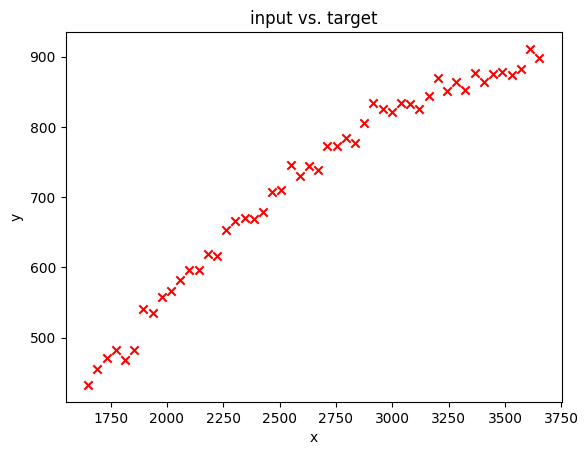

In [4]:
# Plot the entire dataset
plt.scatter(x, y, marker='x', c='r')
plt.title("input vs. target")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Split the dataset into training, cross validation, and test sets

In previous labs, you might have used the entire dataset to train your models. In practice however, it is best to hold out a portion of your data to measure how well your model generalizes to new examples. This will let you know if the model has overfit to your training set.

As mentioned in the lecture, it is common to split your data into three parts:

* ***training set*** - used to train the model
* ***cross validation set (also called validation, development, or dev set)*** - used to evaluate the different model configurations you are choosing from. For example, you can use this to make a decision on what polynomial features to add to your dataset.
* ***test set*** - used to give a fair estimate of your chosen model's performance against new examples. This should not be used to make decisions while you are still developing the models.

Scikit-learn provides a [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function to split your data into the parts mentioned above. In the code cell below, you will split the entire dataset into 60% training, 20% cross validation, and 20% test.

In [5]:
# Get 60% of the dataset as the training set. Put the remaining 40% into temp variables
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.40, random_state=1)

# Split the remaining 40% into 20% cross validation set and 20% test set
x_cv, x_test, y_cv, y_test = train_test_split(x_temp, y_temp, test_size=0.50, random_state=1)

# Delete temp variables
del x_temp, y_temp

print(f"the shape of the training set (input) is: {x_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_cv.shape}\n")
print(f"the shape of the test set (input) is: {x_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}")

the shape of the training set (input) is: (30, 1)
the shape of the training set (target) is: (30, 1)

the shape of the cross validation set (input) is: (10, 1)
the shape of the cross validation set (target) is: (10, 1)

the shape of the test set (input) is: (10, 1)
the shape of the test set (target) is: (10, 1)


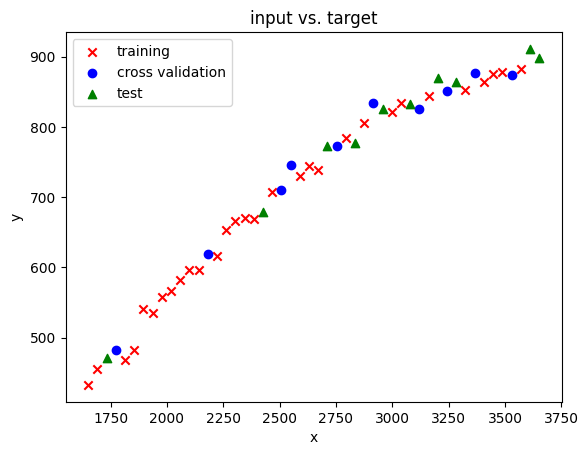

In [6]:
plt.scatter(x_train, y_train, marker='x', c='r', label='training'); 
plt.scatter(x_cv, y_cv, marker='o', c='b', label='cross validation'); 
plt.scatter(x_test, y_test, marker='^', c='g', label='test'); 
plt.title("input vs. target")
plt.xlabel("x"); 
plt.ylabel("y"); 
plt.legend()
plt.show()

## Fit a linear model

Now that you have split the data, one of the first things you can try is to fit a linear model. You will do that in the next sections below.

### Feature scaling

In the previous course of this specialization, you saw that it is usually a good idea to perform feature scaling to help your model converge faster. This is especially true if your input features have widely different ranges of values. Later in this lab, you will be adding polynomial terms so your input features will indeed have different ranges. For example, $x$ runs from around 1600 to 3600, while $x^2$ will run from 2.56 million to 12.96 million. 

You will only use $x$ for this first model but it's good to practice feature scaling now so you can apply it later. For that, you will use the [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) class from scikit-learn. This computes the z-score of your inputs. As a refresher, the z-score is given by the equation:

$$ z = \frac{x - \mu}{\sigma} $$

where $\mu$ is the mean of the feature values and $\sigma$ is the standard deviation. The code below shows how to prepare the training set using the said class. You can plot the results again to inspect if it still follows the same pattern as before. The new graph should have a reduced range of values for `x`.

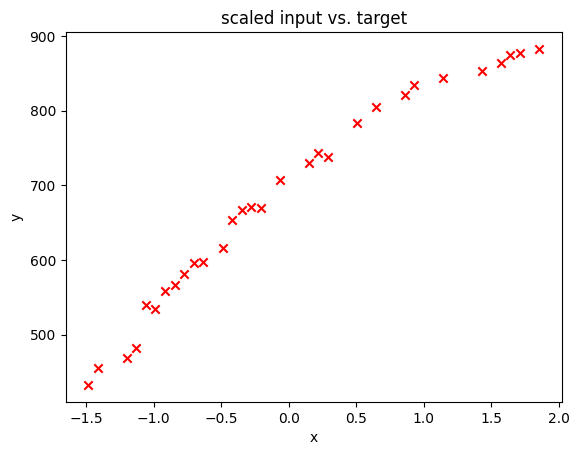

In [7]:
# Initialize the class
scaler_linear = StandardScaler()

# Transform the dataset
X_train_scaled = scaler_linear.fit_transform(x_train)

plt.scatter(X_train_scaled, y_train, marker='x', c='r')
plt.title("scaled input vs. target")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### Train the model

Next, you will create and train a regression model. For this lab, you will use the [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) class but take note that there are other [linear regressors](https://scikit-learn.org/stable/modules/classes.html#classical-linear-regressors) which you can also use.

In [8]:
# Initialize the class
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train_scaled, y_train)

LinearRegression()

### Evaluate the Model

To evaluate the performance of your model, you will measure the error for the training and cross validation sets. For the training error, recall the equation for calculating the mean squared error (MSE):

$$J_{train}(\vec{w}, b) = \frac{1}{2m_{train}}\left[\sum_{i=1}^{m_{train}}(f_{\vec{w},b}(\vec{x}_{train}^{(i)}) - y_{train}^{(i)})^2\right]$$

Scikit-learn also has a built-in [`mean_squared_error()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) function that you can use. Take note though that [as per the documentation](https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error), scikit-learn's implementation only divides by `m` and not `2*m`, where `m` is the number of examples. As mentioned in Course 1 of this Specialization (cost function lectures), dividing by `2m` is a convention we will follow but the calculations should still work whether or not you include it. Thus, to match the equation above, you can use the scikit-learn function then divide by 2 as shown below. We also included a for-loop implementation so you can check that it's equal. 

Another thing to take note: Since you trained the model on scaled values (i.e. using the z-score), you should also feed in the scaled training set instead of its raw values.

In [9]:
# Feed the scaled training set and get the predictions
yhat = linear_model.predict(X_train_scaled)

# Use scikit-learn's utility function and divide by 2
mse = mean_squared_error(y_train, yhat) / 2
print(f"Training MSE: {mse}")

Training MSE: 406.19374192533155


You can then compute the MSE for the cross validation set with basically the same equation:

$$J_{cv}(\vec{w}, b) = \frac{1}{2m_{cv}}\left[\sum_{i=1}^{m_{cv}}(f_{\vec{w},b}(\vec{x}_{cv}^{(i)}) - y_{cv}^{(i)})^2\right]$$

As with the training set, you will also want to scale the cross validation set. An *important* thing to note when using the z-score is you have to use the mean and standard deviation of the **training set** when scaling the cross validation set. This is to ensure that your input features are transformed as expected by the model. One way to gain intuition is with this scenario:

* Say that your training set has an input feature equal to `500` which is scaled down to `0.5` using the z-score.
* After training, your model is able to accurately map this scaled input `x=0.5` to the target output `y=300`. 
* Now let's say that you deployed this model and one of your users fed it a sample equal to `500`. 
* If you get this input sample's z-score using any other values of the mean and standard deviation, then it might not be scaled to `0.5` and your model will most likely make a wrong prediction (i.e. not equal to `y=300`). 

You will scale the cross validation set below by using the same `StandardScaler` you used earlier but only calling its [`transform()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.transform) method instead of [`fit_transform()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.fit_transform).

In [10]:
# Scale the cross validation set using the mean and standard deviation of the training set
X_cv_scaled = scaler_linear.transform(x_cv)

# Feed the scaled cross validation set
yhat = linear_model.predict(X_cv_scaled)

# Use scikit-learn's utility function and divide by 2
mse = mean_squared_error(y_cv, yhat) / 2
print(f"Cross Validation MSE: {mse}")

Cross Validation MSE: 551.7789026952216


## Adding Polynomial Features

From the graphs earlier, you may have noticed that the target `y` rises more sharply at smaller values of `x` compared to higher ones. A straight line might not be the best choice because the target `y` seems to flatten out as `x` increases. Now that you have these values of the training and cross validation MSE from the linear model, you can try adding polynomial features to see if you can get a better performance. 

You can create a loop that contains all the steps in the previous code cells. Here is one implementation that adds polynomial features up to degree=10. We'll plot it at the end to make it easier to compare the results for each model.

In [11]:
# Initialize lists to save the errors, models, and feature transforms
train_mses = []
cv_mses = []
models = []
polys = []
scalers = []

# Loop over 10 times, each adding one more degree of polynomial than the last
for degree in range(1,11):

    # Add polynomial features to the training set
    poly = PolynomialFeatures(degree, include_bias=False)
    X_train_mapped = poly.fit_transform(x_train)
    polys.append(poly)

    # Scale the training set
    scaler_poly = StandardScaler()
    X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)
    scalers.append(scaler_poly)

    # Create and train model 
    model = LinearRegression()
    model.fit(X_train_mapped_scaled, y_train)
    models.append(model)

    # Compute the training MSE
    yhat = model.predict(X_train_mapped_scaled)
    train_mse = mean_squared_error(y_train, yhat) / 2
    train_mses.append(train_mse)

    # Add polynomial features and scale the cross validation set
    X_cv_mapped = poly.transform(x_cv)
    X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)

    # Computer the cross validation MSE
    yhat = model.predict(X_cv_mapped_scaled)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    cv_mses.append(cv_mse)

# Choose the best model, which has the lowest Cross Validation Mean Squared Error
# Add 1 because list indices start at 0
# This also corresponds to the degree fo the polynomial added
degree = np.argmin(cv_mses) + 1
print(f"Lowest CV MSE is found in the model with degree = {degree}")

Lowest CV MSE is found in the model with degree = 4


Now you can publish the generaliization error by computing the test set's MSE with degree 4. As usual, you should transofrm this data the same way you did with the trianing and cross validation sets

In [12]:
# Add polynomial features to the test set
X_test_mapped = polys[degree-1].transform(x_test)

# Scale the test set
X_test_mapped_scaled = scalers[degree-1].transform(X_test_mapped)

# Compute the output y based on the model for the test set
yhat = models[degree-1].predict(X_test_mapped_scaled)
print(f"Two Examples of Test Set Outputs:\n {yhat[:2]} \n")

# Compute the test MSE
test_mse = mean_squared_error(y_test, yhat)

print(f"Training MSE: {train_mses[degree-1]:.2f}")
print(f"Cross Validation MSE: {cv_mses[degree-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")


Two Examples of Test Set Outputs:
 [[847.81]
 [886.04]] 

Training MSE: 47.15
Cross Validation MSE: 79.43
Test MSE: 209.26
